# Pracownia 2 z Analizy numerycznej
### Zadanie 19
#### Autorzy:
Martyna Firgolska  
Michał Dymowski

In [175]:
using Printf

In [176]:
using Plots

Wyniki ogólnie:  
A: I_c i I_s w miarę się liczą  
B: I_c daje bardzo zły wynik, I_s liczy się jak w A  
C: I_c zbiega znacznie lepiej niż w A, I_s jak w A  
D: Wyniki znacznie dokładniejsze niż w pozostałych podpunktach. Dokładności dla IS i IC zachowują się różnie. 

**Badane całki: definicje, przybliżone wartości, wykresy**

In [177]:
# przybliżone wartości całek I_c i I_s, źródło: Wolfram Alpha
#Int_C_exact_value = 1.809048475800544162949576733665114291615983641191003479196640074902159185352954615877833522127454977
#Int_S_exact_value = 0.6205366034467622036163048463307930151490187776648934354652171212875447590052889374947286820148085157
Int_C_exact_value = 1.809045218947
Int_S_exact_value = 0.620549071924

0.620549071924

In [178]:
# badane funkcje zmodyfikowane zgodnie z podpunktem A
# funkcje C i S przyjmują wartość 0 w x=0
function C(x)
    if( x == 0)
        return 0;
    else
        return cos(x)/sqrt(x);
    end
end

function S(x)
    if(x == 0)
        return 0;
    else
        return sin(x)/sqrt(x);
    end
end

S (generic function with 1 method)

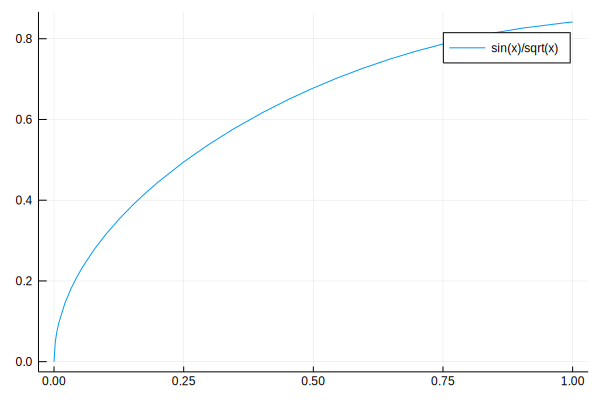

In [179]:
# Wykres funkcji S na badanym przedziale
plot(S, 0, 1, label="sin(x)/sqrt(x)")

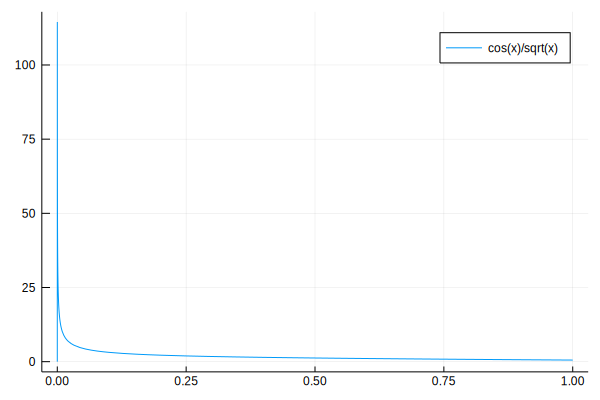

In [180]:
# Wykres funkcji C na badanym przedziale
plot(C, 0, 1, label="cos(x)/sqrt(x)")

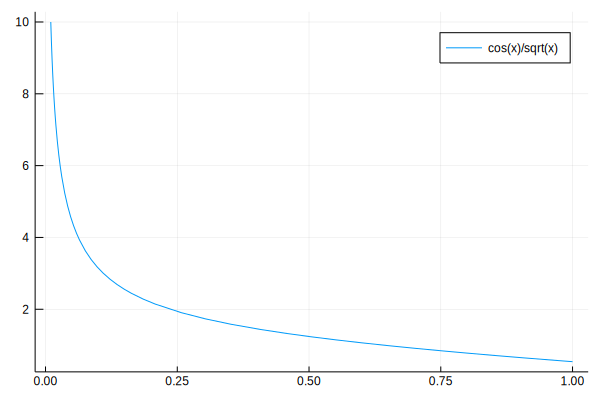

In [181]:
# Wykres funkcji C na przedziale [0.01, 1]
plot(C, 0.01, 1, label="cos(x)/sqrt(x)")

### Metoda trapezów: 

In [182]:
# Całkowanie funkcji f na przedziale [left,right] 
# metodą trapezów z points równoodległymi punktami
function int_trapez(f, left, right, points)
    width = (right-left)/(points-1);
    sum = (f(left)+f(right))*0.5;
    
    for i in 1:(points-1)
        sum += f(left + i*width);
    end
    
    sum *= width;
    return sum;
end

int_trapez (generic function with 1 method)

In [183]:
# Całkowanie funkcji f na przedziale [left,right] 
# metodą trapezów z points równoodległymi punktami
# zaczynajac od prawej strony
function int_trapez_right_to_left(f, left, right, points)
    width = (right-left)/(points-1);
    sum = (f(left)+f(right))*0.5;
    
    for i in (points-1):1
        sum += f(left + i*width);
    end
    
    sum *= width;
    return sum;
end

int_trapez_right_to_left (generic function with 1 method)

### Podpunkt A

In [184]:
## badany zakres ilości punktów metody trapezów
Arange = 100:100:1000

100:100:1000

In [185]:
# wyniki metody trapezów dla I_c
AresultsIC = [int_trapez(C,0.0,1.0,p) for p in Arange]

10-element Array{Float64,1}:
 1.6677256034277628
 1.7082394599682968
 1.726399997150005 
 1.7372928699596446
 1.7447564299910763
 1.750281758632448 
 1.7545855714753669
 1.7580609258924103
 1.7609438155984576
 1.7633856545771385

In [186]:
# wyniki metody trapezów dla I_s
AresultsIS = [int_trapez(S,0.0,1.0,p) for p in Arange]

10-element Array{Float64,1}:
 0.6288262828757042
 0.6246912988653139
 0.6233107905275299
 0.6226195323389588
 0.6222043082298286
 0.6219272438774593
 0.6217291960934527
 0.6215805696160139
 0.6214649112045778
 0.6213723429157811

In [187]:
# moduł błędu bezwzględnego
AerrorIC = abs.([x-Int_C_exact_value for x in AresultsIC])

10-element Array{Float64,1}:
 0.14131961551923733 
 0.10080575897870325 
 0.08264522179699507 
 0.0717523489873555  
 0.06428878895592383 
 0.05876346031455215 
 0.05445964747163323 
 0.050984293054589847
 0.048101403348542515
 0.04565956436986163 

In [188]:
# moduł błędu bezwzględnego
AerrorIS = abs.([x-Int_S_exact_value for x in AresultsIS])

10-element Array{Float64,1}:
 0.008277210951704195 
 0.004142226941313942 
 0.002761718603529917 
 0.0020704604149588413
 0.0016552363058286446
 0.0013781719534593506
 0.0011801241694526787
 0.0010314976920139385
 0.0009158392805778126
 0.0008232709917811443

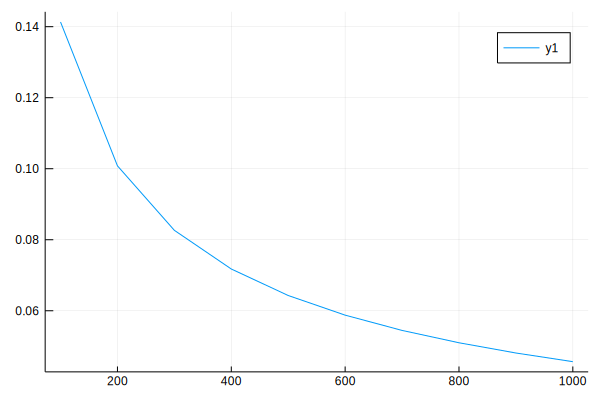

In [189]:
# wykres błędu bezwzględnego w zależności od ilości punktów metody trapezów dla I_c
plot(Arange, AerrorIC)

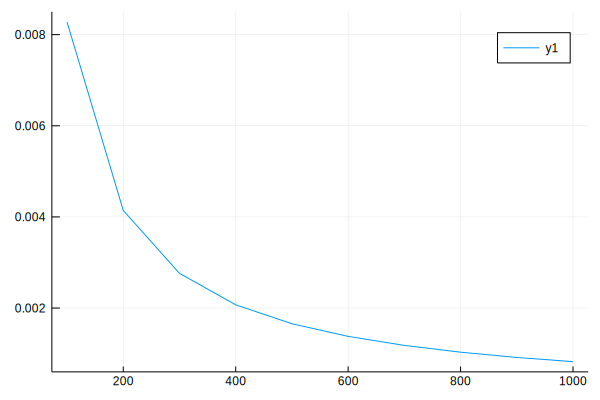

In [190]:
# wykres błędu bezwzględnego w zależności od ilości punktów metody trapezów dla I_s
plot(Arange, AerrorIS)

In [191]:
# błędy względne
Arel_errorIS = [abs(x/Int_S_exact_value) for x in AerrorIS]
Arel_errorIC = [abs(x/Int_C_exact_value) for x in AerrorIC]

10-element Array{Float64,1}:
 0.07811834333333909 
 0.0557231836567246  
 0.045684442230305766
 0.03966310418106671 
 0.0355374140361979  
 0.03248313513620013 
 0.030104083027472816
 0.028182984328200777
 0.026589386956585383
 0.02523959262689902 

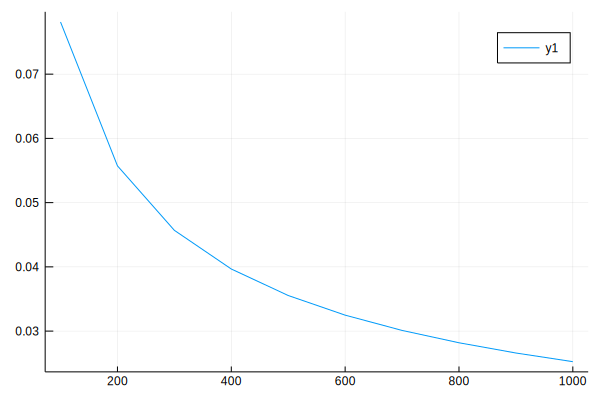

In [192]:
# wykres błędu względnego w zależności od ilości punktów metody trapezów dla I_c
plot(Arange, Arel_errorIC)

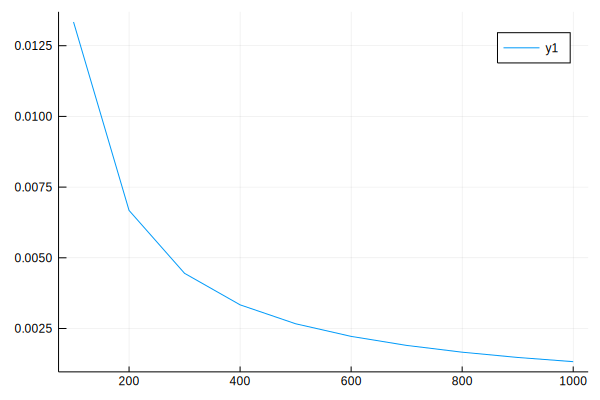

In [193]:
# wykres błędu względnego w zależności od ilości punktów metody trapezów dla I_s
plot(Arange, Arel_errorIS)

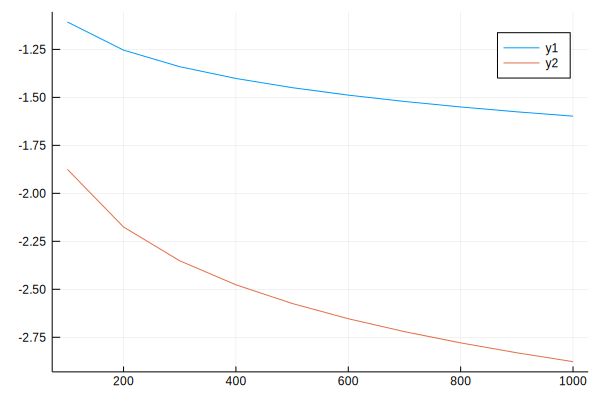

In [194]:
# wykres logarytmu z błędu względnego - porównanie działania metody trapezów dla I_s i I_c
plot(Arange, [log10(x) for x in Arel_errorIC])
plot!(Arange, [log10(x) for x in Arel_errorIS])

Wnioski:  
Metoda poprawnie liczy obie całki, ale lepiej radzi sobie z S  
Prawdopodobnie wynika to z faktu, że funkcja S jest ograniczona 
na badanym przedziale i jej granica w zerze wynosi 0
a funkcja C jest nieograniczona w okolicy 0

### Podpunkt B

In [195]:
## Ale jak użyjemy poprawnie wyprowadzonego wzorku to wyniki już są poprawne ##
# wzorek: int_trapez(C,h,1.0,p)+(2.0/3.0)*sqrt(h)*(2*cos(0*h)+cos(h))
Brange = Arange
h = 2e-10
BresultsIC = [(int_trapez(C,h,1.0,p)+(2.0/3.0)*sqrt(h)*(2*cos(0)+cos(h))) for p in Brange]

10-element Array{Float64,1}:
 358.79239077659105 
 179.3732881036611  
 119.97170938813724 
  90.34719346043909 
  72.5971675786862  
  60.77424835413889 
  52.334498043775646
  46.00757487519528 
  41.088379269190014
  37.15414371263429 

In [196]:
BresultsIS = [(int_trapez(S,h,1.0,p)+(2.0/3.0)*sqrt(h)*(2*sin(0)+sin(h))) for p in Brange]

10-element Array{Float64,1}:
 0.6288263542843195
 0.6246913343871437
 0.6233108141675909
 0.6226195500532103
 0.6222043223934388
 0.6219272556760056
 0.6217292062036702
 0.6215805784605386
 0.6214649190650054
 0.6213723499891415

In [197]:
# nie wiem dlaczego dla S niepoprawny wzorek działa lepiej
# ale zobaczmy jak to będzie wyglądać jeśli za h przyjmiemy 1/p
BresultsICv2 = [(int_trapez(C,1.0/p,1.0,p)+(2.0/3.0)*sqrt(1.0/p)*(2*cos(0)+cos(1.0/p))) for p in Brange]
BresultsISv2 = [(int_trapez(S,1.0/p,1.0,p)+(2.0/3.0)*sqrt(1.0/p)*(2*sin(0)+sin(1.0/p))) for p in Brange]

10-element Array{Float64,1}:
 0.6289110872019322
 0.6247296338953485
 0.6233336846692772
 0.622635190715545 
 0.6222158984721524
 0.6219362781243871
 0.6217364995379555
 0.6215866360800248
 0.6214700568571285
 0.6213767809176636

In [198]:
BerrorICv2 = abs.([x-Int_C_exact_value for x in BresultsICv2])
BerrorISv2 = abs.([x-Int_S_exact_value for x in BresultsISv2])
BerrorIC = abs.([x-Int_C_exact_value for x in BresultsIC])
BerrorIS = abs.([x-Int_S_exact_value for x in BresultsIS])

10-element Array{Float64,1}:
 0.008277282360319549 
 0.004142262463143753 
 0.0027617422435909367
 0.0020704781292103513
 0.0016552504694388182
 0.0013781837520056017
 0.0011801342796702308
 0.0010315065365386067
 0.0009158471410054547
 0.0008232780651414862

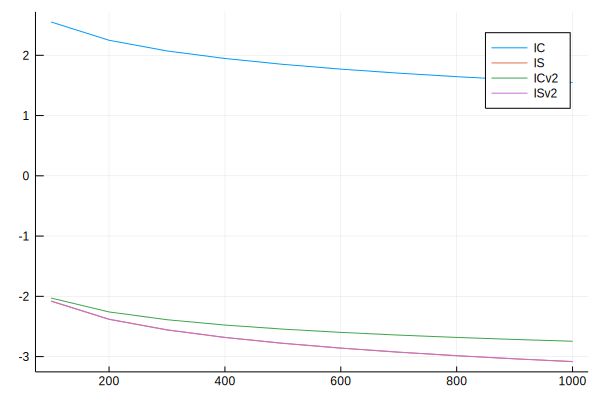

In [199]:
plot(Brange, [log10(x) for x in BerrorIC], label="IC")
plot!(Brange, [log10(x) for x in BerrorIS], label="IS")
plot!(Brange, [log10(x) for x in BerrorICv2], label="ICv2")
plot!(Brange, [log10(x) for x in BerrorISv2], label="ISv2")

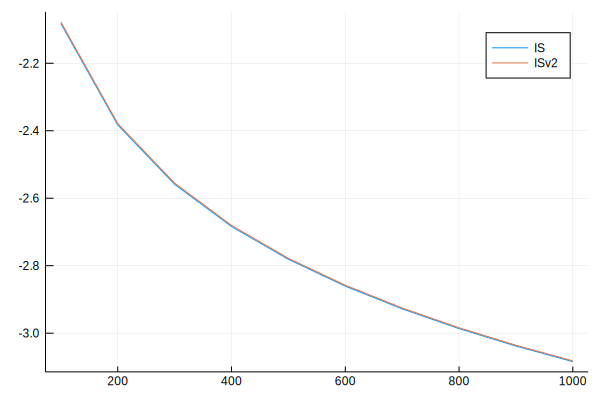

In [200]:
#wykresy Is i Isv2 się pokrywają
plot(Brange, [log10(x) for x in BerrorIS], label="IS")
plot!(Brange, [log10(x) for x in BerrorISv2], label="ISv2")

In [201]:
Brel_errorICv2 = [x/Int_C_exact_value for x in BerrorICv2]
Brel_errorISv2 = [x/Int_S_exact_value for x in BerrorISv2]
Brel_errorIC = [x/Int_C_exact_value for x in BerrorIC]
Brel_errorIS = [x/Int_S_exact_value for x in BerrorIS]

10-element Array{Float64,1}:
 0.013338642719512898 
 0.006675156970746489 
 0.004450481627549954 
 0.003336526026524986 
 0.0026673965755951374
 0.0022209101815793076
 0.0019017581897451687
 0.0016622481334803085
 0.0014758657815181141
 0.0013266929279080685

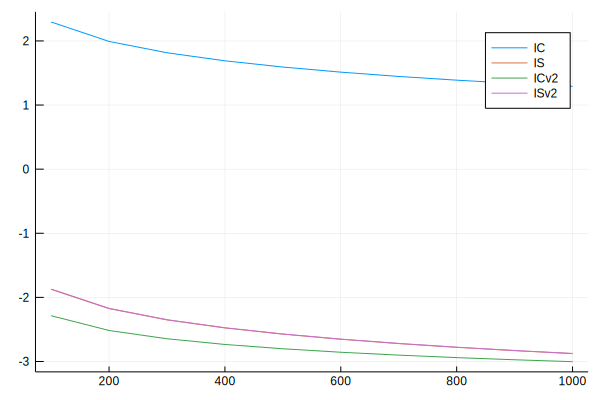

In [202]:
plot(Brange, [log10(x) for x in Brel_errorIC], label="IC")
plot!(Brange, [log10(x) for x in Brel_errorIS], label="IS")
plot!(Brange, [log10(x) for x in Brel_errorICv2], label="ICv2")
plot!(Brange, [log10(x) for x in Brel_errorISv2], label="ISv2")

Wnioski:  
Znowu, tak jak się spodziewaliśmy całka I_s liczy się lepiej  
W I_c widzimy poprawę, gdy zmieniamy wartość h  
I_s daje te same wyniki niezależnie od h

### Podpunkt C

In [203]:
#Podpunkt C, 
#funkcja C zmienia się w 2*cos(t^2), a S w 2*sin(t^2)
Cnew(x) = 2*cos(x^2);
Snew(x) = 2*sin(x^2);


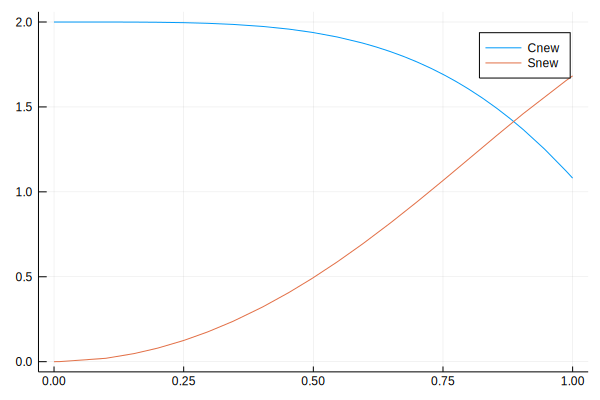

In [204]:
plot(Cnew, 0, 1, label="Cnew")
plot!(Snew, 0, 1, label="Snew")

In [205]:
Crange = 20:20:200
CresultsIC = [int_trapez(Cnew,0.0,1.0,p) for p in Crange]
CresultsIS = [int_trapez(Snew,0.0,1.0,p) for p in Crange]
CresultsIC_rangeA = [int_trapez(Cnew,0.0,1.0,p) for p in Arange]
CresultsIS_rangeA = [int_trapez(Snew,0.0,1.0,p) for p in Arange]

10-element Array{Float64,1}:
 0.6375543934526344
 0.6289981461788563
 0.6261671864394782
 0.624755634400694 
 0.6239099559383896
 0.623346691324667 
 0.622944614354665 
 0.6226431959091088
 0.6224088418274413
 0.6222214105045255

In [206]:
CerrorIC = abs.([x-Int_C_exact_value for x in CresultsIC])
CerrorIS = abs.([x-Int_S_exact_value for x in CresultsIS])
Crel_errorIC = [x/Int_C_exact_value for x in CerrorIC]
Crel_errorIS = [x/Int_S_exact_value for x in CerrorIS]
CerrorIC_rangeA = abs.([x-Int_C_exact_value for x in CresultsIC_rangeA])
CerrorIS_rangeA = abs.([x-Int_S_exact_value for x in CresultsIS_rangeA])
Crel_errorIC_rangeA = [x/Int_C_exact_value for x in CerrorIC_rangeA]
Crel_errorIS_rangeA = [x/Int_S_exact_value for x in CerrorIS_rangeA]

10-element Array{Float64,1}:
 0.02740366926326998  
 0.013615481252208012 
 0.009053457284303675 
 0.006778774905990399 
 0.0054159842733617425
 0.004508296808813307 
 0.0038603593801818845
 0.0033746307582347775
 0.00299697475604161  
 0.0026949336582527787

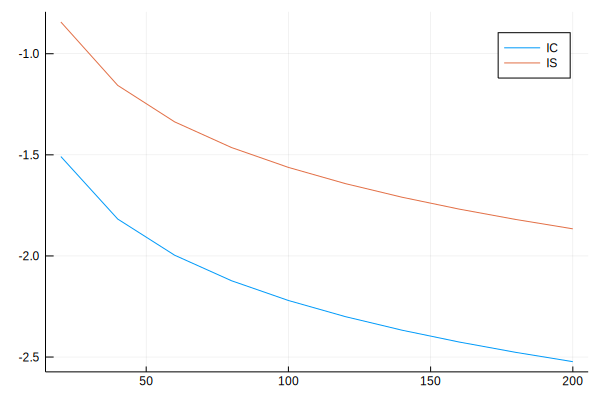

In [207]:
plot(Crange, [log10(x) for x in Crel_errorIC], label="IC")
plot!(Crange, [log10(x) for x in Crel_errorIS], label="IS")

Obserwacje:  
Ta metoda działa lepiej dla I_c niż dla I_s  
Czemu? Może dlatego, że sin(t^2) na przedziale [0,1] przyjmuje wartości bliskie 0, a cosinus nie? No nie wiem?  
W każdym razie funkcja cos(t^2) już nie ma problemu w 0 (tak jak to było dla oryginalnej funkcji C) i pewnie dlatego ta metoda działa lepiej niż reszta

### Podpunkt D

In [208]:
# długość wektora V
vlength(V) = size(V, 1); 
# Zmiana przedziału całkowania z [a,b] na [-1,1]
function shift(f, a, b)
    function out(x)
        return (b-a)*0.5*f((x+1.0)*0.5*(b-a)+a);
    end
    return out
end

shift (generic function with 1 method)

In [209]:
## Kwadratura Gaussa-Legendre'a na przedziale [-1,1]

function gl_base(f, deg)
# punkty
absc = [ [0.5773502691896257645091488], #2
		  [0.0000000000000000000000000,0.7745966692414833770358531], #3
		  [0.3399810435848562648026658,0.8611363115940525752239465], #4
		  [0.0000000000000000000000000,0.5384693101056830910363144,0.9061798459386639927976269], # 5
		  [0.2386191860831969086305017,0.6612093864662645136613996,0.9324695142031520278123016], #6
		  [0.0000000000000000000000000,0.4058451513773971669066064,0.7415311855993944398638648,0.9491079123427585245261897], #7
		  [0.1834346424956498049394761,0.5255324099163289858177390,0.7966664774136267395915539,0.9602898564975362316835609], #8
		  [0.0000000000000000000000000,0.3242534234038089290385380,0.6133714327005903973087020,0.8360311073266357942994298,0.9681602395076260898355762], #9
		  [0.1488743389816312108848260,0.4333953941292471907992659,0.6794095682990244062343274,0.8650633666889845107320967,0.9739065285171717200779640], #10
		  [0.0000000000000000000000000,0.2695431559523449723315320,0.5190961292068118159257257,0.7301520055740493240934163,0.8870625997680952990751578,0.9782286581460569928039380], #11
		  [0.1252334085114689154724414,0.3678314989981801937526915,0.5873179542866174472967024,0.7699026741943046870368938,0.9041172563704748566784659,0.9815606342467192506905491], #12
		  [0.0000000000000000000000000,0.2304583159551347940655281,0.4484927510364468528779129,0.6423493394403402206439846,0.8015780907333099127942065,0.9175983992229779652065478,0.9841830547185881494728294], #13
		  [0.1080549487073436620662447,0.3191123689278897604356718,0.5152486363581540919652907,0.6872929048116854701480198,0.8272013150697649931897947,0.9284348836635735173363911,0.9862838086968123388415973], #14
		  [0.0000000000000000000000000,0.2011940939974345223006283,0.3941513470775633698972074,0.5709721726085388475372267,0.7244177313601700474161861,0.8482065834104272162006483,0.9372733924007059043077589,0.9879925180204854284895657], #15
		  [0.0950125098376374401853193,0.2816035507792589132304605,0.4580167776572273863424194,0.6178762444026437484466718,0.7554044083550030338951012,0.8656312023878317438804679,0.9445750230732325760779884,0.9894009349916499325961542], #16
		  [0.0000000000000000000000000,0.1784841814958478558506775,0.3512317634538763152971855,0.5126905370864769678862466,0.6576711592166907658503022,0.7815140038968014069252301,0.8802391537269859021229557,0.9506755217687677612227170,0.9905754753144173356754340], #17
		  [0.0847750130417353012422619,0.2518862256915055095889729,0.4117511614628426460359318,0.5597708310739475346078715,0.6916870430603532078748911,0.8037049589725231156824175,0.8926024664975557392060606,0.9558239495713977551811959,0.9915651684209309467300160], #18
		  [0.0000000000000000000000000,0.1603586456402253758680961,0.3165640999636298319901173,0.4645707413759609457172671,0.6005453046616810234696382,0.7209661773352293786170959,0.8227146565371428249789225,0.9031559036148179016426609,0.9602081521348300308527788,0.9924068438435844031890177], #19
		  [0.0765265211334973337546404,0.2277858511416450780804962,0.3737060887154195606725482,0.5108670019508270980043641,0.6360536807265150254528367,0.7463319064601507926143051,0.8391169718222188233945291,0.9122344282513259058677524,0.9639719272779137912676661,0.9931285991850949247861224], #20
		  ];
# wagi
weight =[ [1.0000000000000000000000000], #2
		   [0.8888888888888888888888889,0.5555555555555555555555556], #3
		   [0.6521451548625461426269361,0.3478548451374538573730639], #4
		   [0.5688888888888888888888889,0.4786286704993664680412915,0.2369268850561890875142640], # 5
		   [0.4679139345726910473898703,0.3607615730481386075698335,0.1713244923791703450402961], #6
		   [0.4179591836734693877551020,0.3818300505051189449503698,0.2797053914892766679014678,0.1294849661688696932706114], #7
		   [0.3626837833783619829651504,0.3137066458778872873379622,0.2223810344533744705443560,0.1012285362903762591525314], #8
		   [0.3302393550012597631645251,0.3123470770400028400686304,0.2606106964029354623187429,0.1806481606948574040584720,0.0812743883615744119718922], #9
		   [0.2955242247147528701738930,0.2692667193099963550912269,0.2190863625159820439955349,0.1494513491505805931457763,0.0666713443086881375935688], #10
		   [0.2729250867779006307144835,0.2628045445102466621806889,0.2331937645919904799185237,0.1862902109277342514260976,0.1255803694649046246346943,0.0556685671161736664827537], #11
		   [0.2491470458134027850005624,0.2334925365383548087608499,0.2031674267230659217490645,0.1600783285433462263346525,0.1069393259953184309602547,0.0471753363865118271946160], #12
		   [0.2325515532308739101945895,0.2262831802628972384120902,0.2078160475368885023125232,0.1781459807619457382800467,0.1388735102197872384636018,0.0921214998377284479144218,0.0404840047653158795200216], #13
		   [0.2152638534631577901958764,0.2051984637212956039659241,0.1855383974779378137417166,0.1572031671581935345696019,0.1215185706879031846894148,0.0801580871597602098056333,0.0351194603317518630318329], #14
		   [0.2025782419255612728806202,0.1984314853271115764561183,0.1861610000155622110268006,0.1662692058169939335532009,0.1395706779261543144478048,0.1071592204671719350118695,0.0703660474881081247092674,0.0307532419961172683546284], #15
		   [0.1894506104550684962853967,0.1826034150449235888667637,0.1691565193950025381893121,0.1495959888165767320815017,0.1246289712555338720524763,0.0951585116824927848099251,0.0622535239386478928628438,0.0271524594117540948517806], #16
		   [0.1794464703562065254582656,0.1765627053669926463252710,0.1680041021564500445099707,0.1540457610768102880814316,0.1351363684685254732863200,0.1118838471934039710947884,0.0850361483171791808835354,0.0554595293739872011294402,0.0241483028685479319601100], #17
		   [0.1691423829631435918406565,0.1642764837458327229860538,0.1546846751262652449254180,0.1406429146706506512047313,0.1225552067114784601845191,0.1009420441062871655628140,0.0764257302548890565291297,0.0497145488949697964533349,0.0216160135264833103133427], #18
		   [0.1610544498487836959791636,0.1589688433939543476499564,0.1527660420658596667788554,0.1426067021736066117757461,0.1287539625393362276755158,0.1115666455473339947160239,0.0914900216224499994644621,0.0690445427376412265807083,0.0448142267656996003328382,0.0194617882297264770363120], #19
		   [0.1527533871307258506980843,0.1491729864726037467878287,0.1420961093183820513292983,0.1316886384491766268984945,0.1181945319615184173123774,0.1019301198172404350367501,0.0832767415767047487247581,0.0626720483341090635695065,0.0406014298003869413310400,0.0176140071391521183118620], #20
		  ];
# obliczanie całki
  out = 0.0;
  ABSC = absc[deg];
  WEIGHT = weight[deg];

  for i in 1:vlength(ABSC)
	  out += WEIGHT[i]*f(ABSC[i]);
	if (ABSC[i] != 0.0)
	  out += WEIGHT[i]*f(-1.0*ABSC[i]);
	end
  end

  return out;
end

gl_base (generic function with 1 method)

In [210]:
# Wyniki dla IC (po podstawieniu)
DresultsICv2 = [gl_base(shift(Cnew,0,1), i) for i in 1:19]

19-element Array{Float64,1}:
 1.811712813751607 
 1.808856161750068 
 1.8090489650803137
 1.8090485296613197
 1.8090484754861307
 1.8090484757945726
 1.8090484758005878
 1.8090484758005443
 1.8090484758005438
 1.8090484758005443
 1.8090484758005445
 1.8090484758005443
 1.809048475800544 
 1.809048475800544 
 1.8090484758005443
 1.809048475800544 
 1.8090484758005438
 1.8090484758005445
 1.809048475800544 

In [211]:
# wartość błędu bezwzględnego - IC (po podstawieniu)
DerrorICv2 = abs.([x-Int_C_exact_value for x in DresultsICv2])

19-element Array{Float64,1}:
 0.0026675948046068765 
 0.00018905719693207423
 3.746133313553557e-6  
 3.3107143195820754e-6 
 3.256539130580549e-6  
 3.256847572519206e-6  
 3.2568535877075533e-6 
 3.2568535441868107e-6 
 3.2568535437427215e-6 
 3.2568535441868107e-6 
 3.2568535444088553e-6 
 3.2568535441868107e-6 
 3.256853543964766e-6  
 3.256853543964766e-6  
 3.2568535441868107e-6 
 3.256853543964766e-6  
 3.2568535437427215e-6 
 3.2568535444088553e-6 
 3.256853543964766e-6  

In [212]:
# Wyniki dla IS (po podstawieniu)
DresultsISv2 = [gl_base(shift(Snew,0,1), i) for i in 1:19]

19-element Array{Float64,1}:
 0.6273119924552861
 0.6205537702420836
 0.6205328934327076
 0.6205366207960306
 0.6205366040702774
 0.6205366034426264
 0.6205366034467139
 0.6205366034467626
 0.6205366034467623
 0.6205366034467622
 0.6205366034467622
 0.6205366034467621
 0.6205366034467623
 0.6205366034467621
 0.6205366034467622
 0.6205366034467623
 0.6205366034467623
 0.6205366034467621
 0.6205366034467623

In [213]:
# wartość błędu bezwzględnego - IC (po podstawieniu)
DerrorISv2 = abs.([x-Int_S_exact_value for x in DresultsISv2])

19-element Array{Float64,1}:
 0.006762920531286132 
 4.698318083584674e-6 
 1.6178491292428987e-5
 1.2451127969437259e-5
 1.2467853722553102e-5
 1.2468481373595353e-5
 1.2468477286087243e-5
 1.2468477237348452e-5
 1.2468477237681519e-5
 1.2468477237792541e-5
 1.2468477237792541e-5
 1.2468477237903564e-5
 1.2468477237681519e-5
 1.2468477237903564e-5
 1.2468477237792541e-5
 1.2468477237681519e-5
 1.2468477237681519e-5
 1.2468477237903564e-5
 1.2468477237681519e-5

In [214]:
# błąd względny - IS (po podstawieniu)
Drel_errorISv2 = [abs(x/Int_S_exact_value) for x in DerrorISv2]

19-element Array{Float64,1}:
 0.010898284821082451 
 7.57122731489652e-6  
 2.6071252096579402e-5
 2.0064695175246635e-5
 2.00916483266936e-5  
 2.0092659771349065e-5
 2.0092653184427428e-5
 2.009265310588603e-5 
 2.009265310642276e-5 
 2.0092653106601668e-5
 2.0092653106601668e-5
 2.0092653106780578e-5
 2.009265310642276e-5 
 2.0092653106780578e-5
 2.0092653106601668e-5
 2.009265310642276e-5 
 2.009265310642276e-5 
 2.0092653106780578e-5
 2.009265310642276e-5 

In [215]:
# błąd względny - IC (po podstawieniu)
Drel_errorICv2 = [abs(x/Int_C_exact_value) for x in DerrorICv2]

19-element Array{Float64,1}:
 0.0014745871339576667
 0.0001045066176079997
 2.070779256548428e-6 
 1.8300893117028658e-6
 1.800142470996993e-6 
 1.8003129708470943e-6
 1.800316295909555e-6 
 1.8003162718522555e-6
 1.8003162716067729e-6
 1.8003162718522555e-6
 1.800316271974997e-6 
 1.8003162718522555e-6
 1.8003162717295143e-6
 1.8003162717295143e-6
 1.8003162718522555e-6
 1.8003162717295143e-6
 1.8003162716067729e-6
 1.800316271974997e-6 
 1.8003162717295143e-6

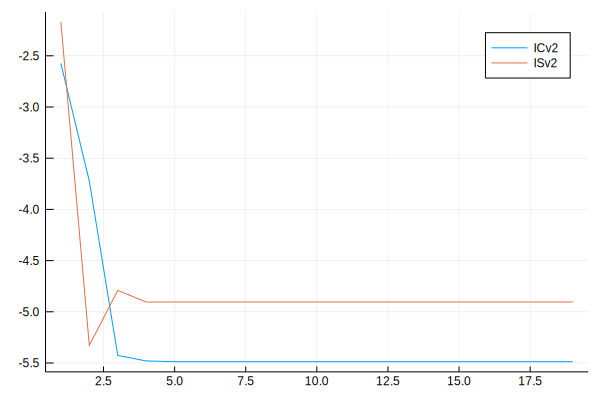

In [216]:
#　wykres błędu bezwględnego w zależności od stopnia kwadratury, stopnie z przedziału 1:20
plot([log10(x) for x in DerrorICv2], label="ICv2")
plot!([log10(x) for x in DerrorISv2], label="ISv2")

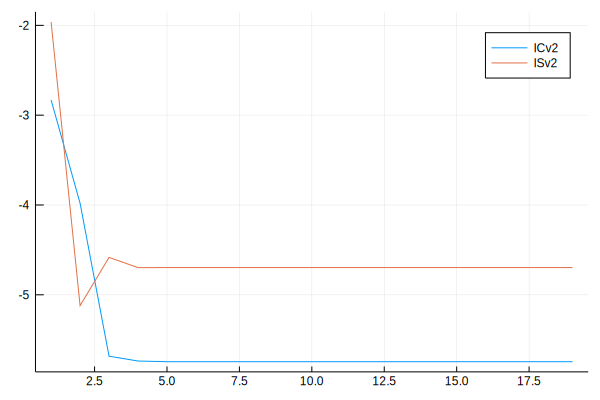

In [217]:
#  wykres błędu względnego w zależności od stopnia kwadratury, stopnie z przedziału 1:20
plot([log10(x) for x in Drel_errorICv2], label="ICv2")
plot!([log10(x) for x in Drel_errorISv2], label="ISv2")

## D.2
### złożone kwadratury Gaussa-Legendre'a

In [218]:
# Złożona kwadratura Gaussa-Legendre'a na przedziale [0,1]
function wtf(f, div, deg) # div - podział przedziału [0,1]
    out = 0.0;
    for i in 1:(vlength(div)-1)
        out += gl_base(shift(f,div[i],div[i+1]),deg);
    end
    
    return out
end

function eqd(steps) # podział odcinka punktami równoodległymi
    return [i*(1/Float64(steps)) for i in 0:steps]
end

eqd (generic function with 1 method)

In [219]:
# Wyniki dla IC (po podstawieniu)
D2resultsICv2 = [wtf(Cnew, eqd(3), i) for i in 1:19]

19-element Array{Float64,1}:
 1.8090504393247837
 1.8090482447860592
 1.8090484762153896
 1.8090484758009722
 1.8090484758005427
 1.809048475800544 
 1.8090484758005443
 1.8090484758005443
 1.809048475800544 
 1.809048475800544 
 1.809048475800544 
 1.8090484758005438
 1.8090484758005436
 1.809048475800544 
 1.809048475800544 
 1.8090484758005443
 1.8090484758005443
 1.8090484758005443
 1.809048475800544 

In [220]:
# wartość błędu bezwzględnego - IC (po podstawieniu)
D2errorICv2 = abs.([x-Int_C_exact_value for x in D2resultsICv2])

19-element Array{Float64,1}:
 5.220377783610175e-6 
 3.0258390590898188e-6
 3.2572683894560583e-6
 3.2568539720667644e-6
 3.2568535426324985e-6
 3.256853543964766e-6 
 3.2568535441868107e-6
 3.2568535441868107e-6
 3.256853543964766e-6 
 3.256853543964766e-6 
 3.256853543964766e-6 
 3.2568535437427215e-6
 3.256853543520677e-6 
 3.256853543964766e-6 
 3.256853543964766e-6 
 3.2568535441868107e-6
 3.2568535441868107e-6
 3.2568535441868107e-6
 3.256853543964766e-6 

In [221]:
D2rel_errorICv2 = [x/Int_C_exact_value for x in D2errorICv2]

19-element Array{Float64,1}:
 2.885708841843559e-6 
 1.6726165976387722e-6
 1.8005455890992226e-6
 1.8003165083747866e-6
 1.8003162709930664e-6
 1.8003162717295143e-6
 1.8003162718522555e-6
 1.8003162718522555e-6
 1.8003162717295143e-6
 1.8003162717295143e-6
 1.8003162717295143e-6
 1.8003162716067729e-6
 1.8003162714840317e-6
 1.8003162717295143e-6
 1.8003162717295143e-6
 1.8003162718522555e-6
 1.8003162718522555e-6
 1.8003162718522555e-6
 1.8003162717295143e-6

In [222]:
# Wyniki dla IS (po podstawieniu)
D2resultsISv2 = [wtf(Snew, eqd(3), i) for i in 1:19]

19-element Array{Float64,1}:
 0.6206206460519256
 0.6205364964408516
 0.6205366030523062
 0.6205366034476796
 0.6205366034467625
 0.6205366034467621
 0.6205366034467622
 0.6205366034467623
 0.6205366034467622
 0.6205366034467621
 0.6205366034467623
 0.6205366034467621
 0.6205366034467622
 0.6205366034467621
 0.6205366034467622
 0.6205366034467622
 0.6205366034467622
 0.6205366034467621
 0.6205366034467623

In [223]:
# wartość błędu bezwzględnego - IS (po podstawieniu)
D2errorISv2 = abs.([x-Int_S_exact_value for x in D2resultsISv2])

19-element Array{Float64,1}:
 7.157412792557771e-5 
 1.2575483148369315e-5
 1.2468871693815942e-5
 1.2468476320415256e-5
 1.2468477237459474e-5
 1.2468477237903564e-5
 1.2468477237792541e-5
 1.2468477237681519e-5
 1.2468477237792541e-5
 1.2468477237903564e-5
 1.2468477237681519e-5
 1.2468477237903564e-5
 1.2468477237792541e-5
 1.2468477237903564e-5
 1.2468477237792541e-5
 1.2468477237792541e-5
 1.2468477237792541e-5
 1.2468477237903564e-5
 1.2468477237681519e-5

In [224]:
D2rel_errorISv2 = [x/Int_S_exact_value for x in D2errorISv2]

19-element Array{Float64,1}:
 0.00011533999672848363
 2.0265090574351005e-5 
 2.0093288763056973e-5 
 2.0092651628270098e-5 
 2.009265310606494e-5  
 2.0092653106780578e-5 
 2.0092653106601668e-5 
 2.009265310642276e-5  
 2.0092653106601668e-5 
 2.0092653106780578e-5 
 2.009265310642276e-5  
 2.0092653106780578e-5 
 2.0092653106601668e-5 
 2.0092653106780578e-5 
 2.0092653106601668e-5 
 2.0092653106601668e-5 
 2.0092653106601668e-5 
 2.0092653106780578e-5 
 2.009265310642276e-5  

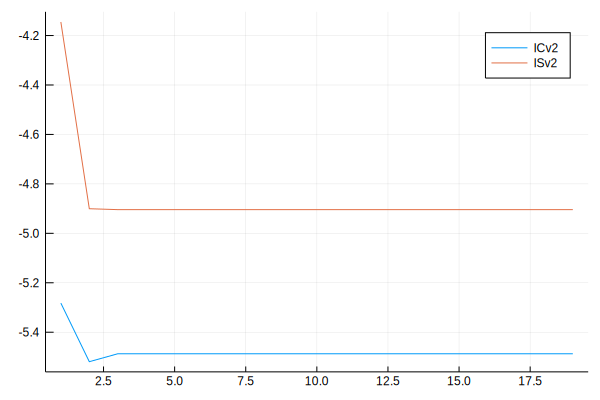

In [225]:
plot([log10(x) for x in D2errorICv2], label="ICv2")
plot!([log10(x) for x in D2errorISv2], label="ISv2")

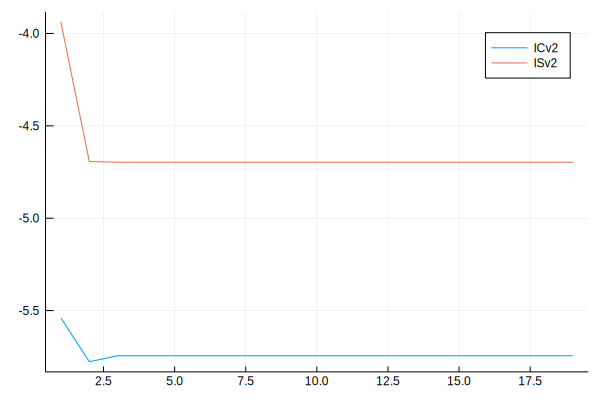

In [226]:
plot([log10(x) for x in D2rel_errorICv2], label="ICv2")
plot!([log10(x) for x in D2rel_errorISv2], label="ISv2")

## #Podsumowanie wszystkich metod:

In [227]:
#DISv2 =["IS deg 1","IS deg 2","IS deg 3","IS deg 4"]
#DICv2 =["IC deg 1","IC deg 2","IC deg 4","IC deg 4"]

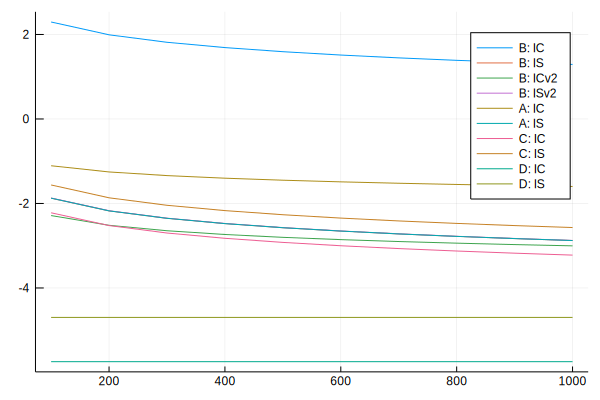

In [228]:
plo=plot(Brange, [log10(x) for x in Brel_errorIC], label="B: IC")
plo=plot!(Brange, [log10(x) for x in Brel_errorIS], label="B: IS")
plo=plot!(Brange, [log10(x) for x in Brel_errorICv2], label="B: ICv2")
plo=plot!(Brange, [log10(x) for x in Brel_errorISv2], label="B: ISv2")
plo=plot!(Arange, [log10(x) for x in Arel_errorIC], label="A: IC")
plo=plot!(Arange, [log10(x) for x in Arel_errorIS], label="A: IS")
plo=plot!(Arange, [log10(x) for x in Crel_errorIC_rangeA], label="C: IC")
plo=plot!(Arange, [log10(x) for x in Crel_errorIS_rangeA], label="C: IS")
#or i in 3:4
#    plo=plot!(Arange, [log10(Drel_errorISv2[i]) for x in Arange], label=DISv2[i])
#    plo=plot!(Arange, [log10(Drel_errorICv2[i]) for x in Arange], label=DICv2[i])
#end
plo=plot!(Arange, [log10(Drel_errorICv2[5]) for x in Arange], label="D: IC")
plo=plot!(Arange, [log10(Drel_errorISv2[5]) for x in Arange], label="D: IS")
plo

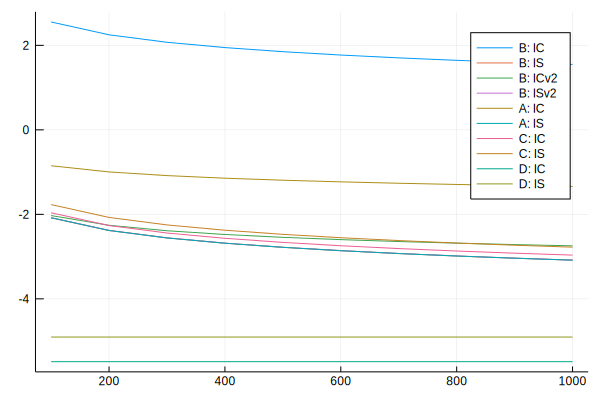

In [229]:
plo=plot(Brange, [log10(x) for x in BerrorIC], label="B: IC")
plo=plot!(Brange, [log10(x) for x in BerrorIS], label="B: IS")
plo=plot!(Brange, [log10(x) for x in BerrorICv2], label="B: ICv2")
plo=plot!(Brange, [log10(x) for x in BerrorISv2], label="B: ISv2")
plo=plot!(Arange, [log10(x) for x in AerrorIC], label="A: IC")
plo=plot!(Arange, [log10(x) for x in AerrorIS], label="A: IS")
plo=plot!(Arange, [log10(x) for x in CerrorIC_rangeA], label="C: IC")
plo=plot!(Arange, [log10(x) for x in CerrorIS_rangeA], label="C: IS")
#for i in 3:4
#    plo=plot!(Arange, [log10(DerrorISv2[i]) for x in Arange], label=DISv2[i])
#    plo=plot!(Arange, [log10(DerrorICv2[i]) for x in Arange], label=DICv2[i])
#end
plo=plot!(Arange, [log10(DerrorICv2[5]) for x in Arange], label="D: IC")
plo=plot!(Arange, [log10(DerrorISv2[5]) for x in Arange], label="D: IS")
plo